<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Ramki/E533_DLS_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [37]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


In [4]:
mnist = tf.keras.datasets.mnist

In [41]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [38]:
print("Training Data:",x_train.shape)
print("Training Label Data:",y_train.shape)
print("Testing Data:",x_test.shape)
print("Testing Label Data:",y_test.shape)

Training Data: (60000, 28, 28)
Training Label Data: (60000,)
Testing Data: (10000, 28, 28)
Testing Label Data: (10000,)


In [80]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(10)
])

In [81]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 1024)              803840    
                                                                 
 dense_31 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_32 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_33 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_34 (Dense)            (None, 10)                10250     
                                                                 
Total params: 3,962,890
Trainable params: 3,962,890
No

In [82]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 27.589901 ,   7.5650334,   9.100853 , -18.485191 , -31.14018  ,
        -16.905827 , -11.215538 ,   4.673361 ,  25.34169  , -13.927121 ]],
      dtype=float32)

In [83]:
tf.nn.softmax(predictions).numpy()

array([[9.0449607e-01, 1.8185157e-09, 8.4472465e-09, 8.8358504e-21,
        2.8200523e-26, 4.2870422e-20, 1.2688745e-17, 1.0089735e-10,
        9.5503896e-02, 8.4293391e-19]], dtype=float32)

In [84]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")

In [85]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 2.0586 - acc: 0.9072
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1105 - acc: 0.9661
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0858 - acc: 0.9739
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0781 - acc: 0.9761
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0717 - acc: 0.9783
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0634 - acc: 0.9812
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0608 - acc: 0.9816
Epoch 8/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0623 - acc: 0.9824
Epoch 9/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0503 - acc: 0.9855
Epoch 10/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0567 - acc: 0.9835
Epoch 11/20
469/469 [============================

In [46]:
history.history

{'loss': [2.369478940963745,
  0.11330985277891159,
  0.0902252122759819,
  0.07263243198394775,
  0.07291463017463684,
  0.06760351359844208,
  0.06430675089359283,
  0.06198308989405632,
  0.05644608661532402,
  0.05095967277884483,
  0.04742147773504257,
  0.05021340027451515,
  0.05451411381363869,
  0.041958801448345184,
  0.03768983483314514,
  0.03692552074790001,
  0.05466450750827789,
  0.05074544996023178,
  0.036656107753515244,
  0.047299232333898544],
 'acc': [0.904533326625824,
  0.9651166796684265,
  0.9719833135604858,
  0.9777166843414307,
  0.9785166382789612,
  0.9801666736602783,
  0.980983316898346,
  0.9826666712760925,
  0.9838666915893555,
  0.9854000210762024,
  0.9867333173751831,
  0.9863166809082031,
  0.9854833483695984,
  0.988099992275238,
  0.9902999997138977,
  0.989983320236206,
  0.9866166710853577,
  0.9873999953269958,
  0.9909499883651733,
  0.9888499975204468]}

In [47]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1400 - acc: 0.9750


In [48]:
print(test_acc)

0.9750000238418579


In [49]:
# evaluate the model
y_pred =  tf.nn.softmax(model.predict(x_test))[:1000]

In [50]:
y_pred = y_pred.numpy().argmax(axis=1)

In [51]:
y_pred[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [52]:
result = np.where(y_pred == 8)
print(result[0].shape)

(97,)


In [23]:
confusion_matrix(y_test[:1000], y_pred)

array([[ 85,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 125,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   3, 106,   1,   0,   0,   1,   4,   0,   1],
       [  0,   0,   0, 106,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0, 105,   0,   1,   0,   0,   4],
       [  0,   0,   0,   1,   1,  83,   0,   0,   2,   0],
       [  1,   0,   0,   0,   0,   0,  86,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,  98,   0,   0],
       [  0,   0,   2,   1,   1,   0,   0,   0,  84,   1],
       [  0,   0,   0,   0,   1,   0,   0,   0,   1,  92]])

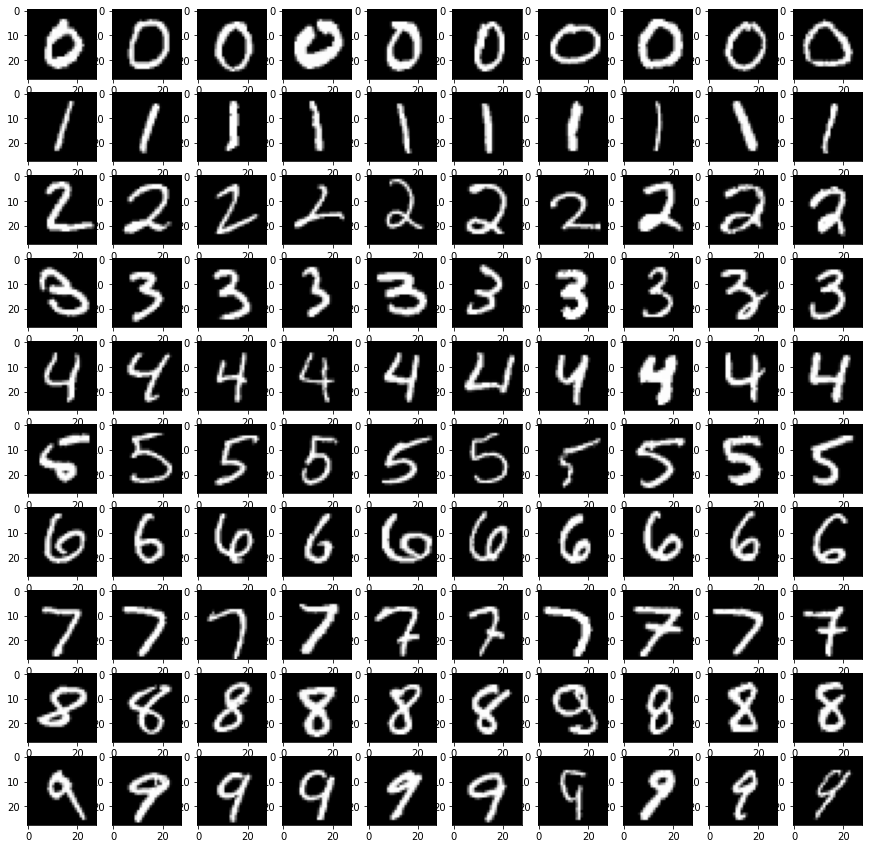

In [53]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):  
    result = np.where(y_pred == i)
    for j in range(10):
      axs[i,j].imshow(x_test[result[0][:10][j]], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
b

In [54]:
total_idx = np.array(range(0,len(x_test)))
random_idxs = np.random.choice(a=total_idx,size=1000,replace=False)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

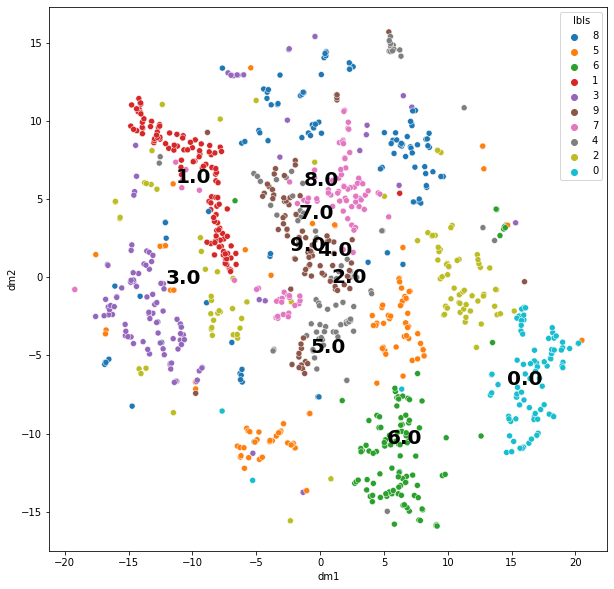

In [55]:
test_imgs = x_test[random_idxs]
test_labels = y_test[random_idxs]

#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=150).fit_transform(test_imgs.reshape([1000,28*28]))
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

[]

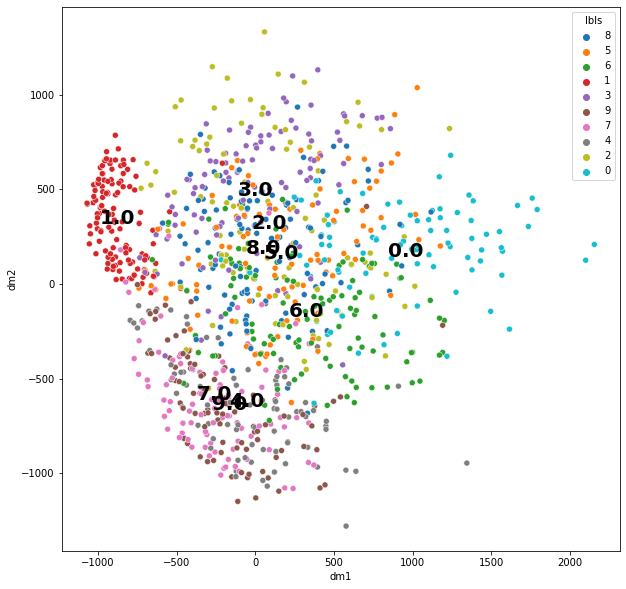

In [57]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(test_imgs.reshape([1000,28*28]))

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [ ]:
model

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Model
model2 = Model(inputs=[model.input], outputs=[model.layers[2].output,])
model2.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h1_activations = model2.predict(test_imgs)

[<keras.layers.core.flatten.Flatten object at 0x7fd083970c90>, <keras.layers.core.dense.Dense object at 0x7fd083970510>, <keras.layers.core.dense.Dense object at 0x7fd0837734d0>, <keras.layers.core.dense.Dense object at 0x7fd083773650>, <keras.layers.core.dense.Dense object at 0x7fd08382c4d0>, <keras.layers.core.dense.Dense object at 0x7fd08382cb50>]


In [96]:
print(h1_activations.shape)

(1000, 1024)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

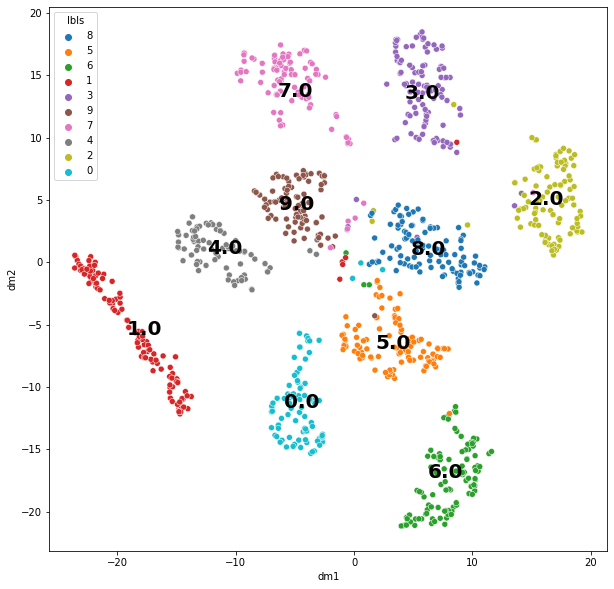

In [99]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h1_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

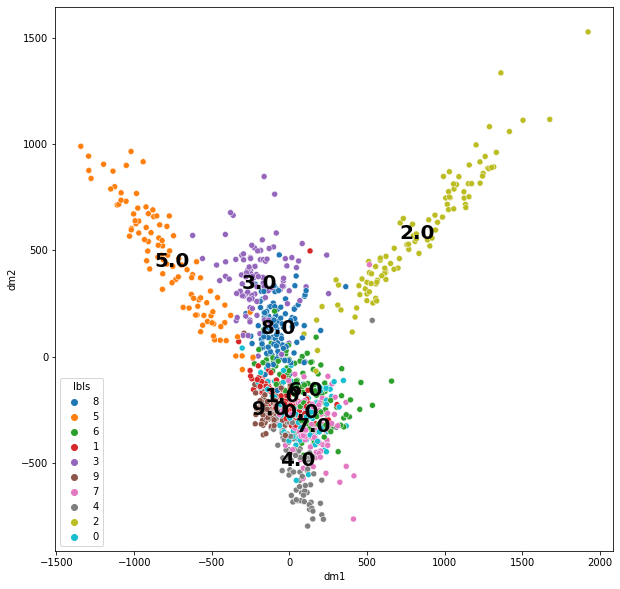

In [100]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h1_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

Problem 2: Adult Optimization

In [6]:
normal_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
xavier_initializer = tf.keras.initializers.GlorotNormal()
he_initializer = tf.keras.initializers.HeNormal()

In [7]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(10,kernel_initializer=normal_initializer)
])

In [8]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(10,kernel_initializer=xavier_initializer)
])

In [9]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(10,kernel_initializer=normal_initializer)
])

In [10]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(10,kernel_initializer=xavier_initializer)
])

In [11]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(10,kernel_initializer=he_initializer)
])

In [30]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
# print("[INFO] training network...")
model1.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model2.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model3.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model4.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model5.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [31]:
history1 = model1.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/50
469/469 [==============================] - 2s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 

In [32]:
history2 = model2.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 20s 43ms/step - loss: 2.3069 - accuracy: 0.1050 - val_loss: 2.3053 - val_accuracy: 0.0982
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3060 - accuracy: 0.1060 - val_loss: 2.3122 - val_accuracy: 0.1032
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3063 - accuracy: 0.1029 - val_loss: 2.3053 - val_accuracy: 0.1009
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 2.3062 - accuracy: 0.1026 - val_loss: 2.3079 - val_accuracy: 0.1135
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 2.3059 - accuracy: 0.1042 - val_loss: 2.3037 - val_accuracy: 0.1010
Epoch 6/50
469/469 [==============================] - 2s 3ms/step - loss: 2.3063 - accuracy: 0.1061 - val_loss: 2.3065 - val_accuracy: 0.1032
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3057 - accuracy: 0.1046 - val_loss: 2.3108 - val_accuracy: 0.0892
Epoc

In [33]:
history3 = model3.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/50
469/469 [==============================] - 2s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 

In [34]:
history4 = model4.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/50
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/50
469/469 [============================

In [35]:
history5 = model5.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/50
469/469 [============================

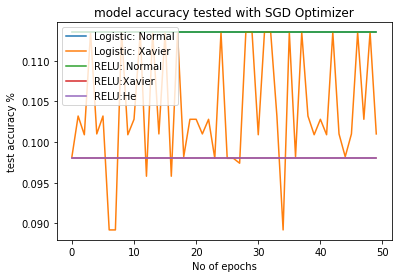

In [36]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy tested with SGD Optimizer')
plt.ylabel('test accuracy %')
plt.xlabel('No of epochs')
plt.legend(['Logistic: Normal', 'Logistic: Xavier', 'RELU: Normal', 'RELU:Xavier','RELU:He'], loc='upper left')
plt.show()

In [21]:
model1.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model2.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model3.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model4.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model5.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [22]:
history1 = model1.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3079 - accuracy: 0.1121 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3019 - accuracy: 0.1115 - val_loss: 2.3020 - val_accuracy: 0.1010
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3019 - accuracy: 0.1115 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3019 - accuracy: 0.1121 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3020 - accuracy: 0.1113 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 6/50
469/469 [==============================] - 2s 3ms/step - loss: 2.3020 - accuracy: 0.1104 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 2.3018 - accuracy: 0.1119 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 

In [23]:
history2 = model2.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 3.2593 - accuracy: 0.1023 - val_loss: 2.3796 - val_accuracy: 0.1010
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3937 - accuracy: 0.1020 - val_loss: 2.4090 - val_accuracy: 0.0974
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3932 - accuracy: 0.1000 - val_loss: 2.4209 - val_accuracy: 0.0982
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 2.4010 - accuracy: 0.1014 - val_loss: 2.4288 - val_accuracy: 0.0958
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 2.4019 - accuracy: 0.1013 - val_loss: 2.3531 - val_accuracy: 0.0958
Epoch 6/50
469/469 [==============================] - 2s 3ms/step - loss: 2.4055 - accuracy: 0.1028 - val_loss: 2.3959 - val_accuracy: 0.1135
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 2.4130 - accuracy: 0.1019 - val_loss: 2.4231 - val_accuracy: 0.1135
Epoch 

In [24]:
history3 = model3.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 263.3372 - accuracy: 0.1128 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3018 - accuracy: 0.1112 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3018 - accuracy: 0.1119 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3018 - accuracy: 0.1105 - val_loss: 2.3021 - val_accuracy: 0.0980
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3019 - accuracy: 0.1113 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3018 - accuracy: 0.1115 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/50
469/469 [==============================] - 2s 3ms/step - loss: 2.3019 - accuracy: 0.1110 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoc

In [25]:
history4 = model4.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/50
469/469 [============================

In [26]:
history5 = model5.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/50
469/469 [============================

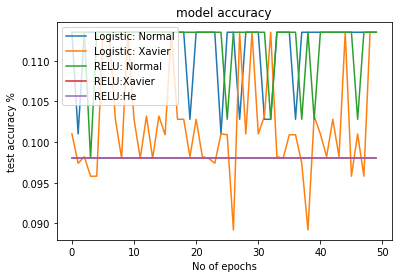

In [27]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy tested with Adam Optimizer')
plt.ylabel('test accuracy %')
plt.xlabel('No of epochs')
plt.legend(['Logistic: Normal', 'Logistic: Xavier', 'RELU: Normal', 'RELU:Xavier','RELU:He'], loc='upper left')
plt.show()

In [29]:
# w_value = xavier_initializer(shape=(784,512))
# b_value = xavier_initializer(shape=(512,))
# model1.layers[1].set_weights([w_value,b_value])
# w_value1 = xavier_initializer(shape=(512,512))
# model1.layers[2].set_weights([w_value1,b_value])
# w_value2 = xavier_initializer(shape=(512,512))
# model1.layers[3].set_weights([w_value2,b_value])
# w_value3 = xavier_initializer(shape=(512,512))
# model1.layers[4].set_weights([w_value3,b_value])
# w_value4 = xavier_initializer(shape=(512,10))
# b_value4 = xavier_initializer(shape=(10,))
# model1.layers[5].set_weights([w_value4,b_value4])